In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/
Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


## Data Collection
Labelled data of almost 800+ labelled resume images was collected from Roboflow, a Computer Vision Related Dataset sharing site.  
[Dataset link](https://universe.roboflow.com/abhijith-m-czikf/pdflayoutdetection/browse?queryText=&pageSize=50&startingIndex=0&browseQuery=true)

### About the Dataset
The dataset contains three folders train, test and valid, each having their usual meanings.  
Under each subfolder there exists a images and labels folder, in which the labels folder has individual text file for each image containing the boundaries for each region for a paritcular image.

In [ ]:
# %%shell

# # one time only

# apt-get install unzip
# mkdir -p /content/gdrive/MyDrive/dataset/PdfLayoutDetection 
# unzip /content/gdrive/MyDrive/dataset/PdfLayoutDetection.zip -d /content/gdrive/MyDrive/dataset/PdfLayoutDetection  

In [ ]:
DATASET_PATH = '/content/gdrive/MyDrive/dataset/PdfLayoutDetection'

## YOLO
YOLO (You Only Look Once) is a real-time object detection system that uses a deep neural network to detect objects in images or video frames. YOLO can detect multiple objects in a single image and classify them into predefined categories.  
We use YOLOv8 in for the task of resume parsing as it
with 

*   Python API for easier workflows
*   Uses Transer learning
*   Can segment image regions with a small and diverse dataset (such as resumes, with each having an different format)
*   Easily avaiable labelled data for YOLO models



In [ ]:
%%shell
# # to be run only when training

rm -rf /content/ultralytics || true
git clone https://github.com/ultralytics/ultralytics.git

data='/content/gdrive/MyDrive/dataset/PdfLayoutDetection'
rm -rf /content/PdfLayoutDetection || true
cp -r $data /content

pip install ultralytics easyocr

Cloning into 'ultralytics'...
remote: Enumerating objects: 8126, done.
remote: Counting objects: 100% (239/239), done.
remote: Compressing objects: 100% (132/132), done.
remote: Total 8126 (delta 138), reused 184 (delta 107), pack-reused 7887
Receiving objects: 100% (8126/8126), 5.81 MiB | 19.77 MiB/s, done.
Resolving deltas: 100% (5456/5456), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 584.5/584.5 kB 28.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 60.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.3/203.3 kB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.6/47.6 MB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 813.9/813.9 kB 58.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 kB 20.2 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing

In [ ]:
!cat /content/PdfLayoutDetection/data.yaml

## Training the model
We use a command line utility `yolo` in order to train the model.

In [ ]:
%%shell
# only to be run when training
yolo task=detect \
    mode=train \
    model=yolov8l.pt \
    data=/content/PdfLayoutDetection/data.yaml \
    epochs=30

Ultralytics YOLOv8.0.99 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8l.pt, data=/content/PdfLayoutDetection/data.yaml, epochs=30, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=Fa

In [ ]:
# only execute when training for the first time
%%shell
mkdir -p /content/gdrive/MyDrive/resumeRoboflow
cp -r /content/ultralytics /content/gdrive/MyDrive/resumeRoboflow 
cp -r /content/runs /content/gdrive/MyDrive/resumeRoboflow/ultralytics

In [ ]:
%%shell
yolo task=detect mode=predict model='/content/runs/detect/train/weights/best.pt' \
    source='/content/PdfLayoutDetection/valid/images/230308083417-0_png.rf.2b4daae7ccd1ea69191c5d51eba2e208.jpg' 

Ultralytics YOLOv8.0.99 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/PdfLayoutDetection/valid/images/230308083417-0_png.rf.2b4daae7ccd1ea69191c5d51eba2e208.jpg: 640x480 17 blocks, 129.1ms
Speed: 2.0ms preprocess, 129.1ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


In [ ]:
%%shell
# load the model from the gdrive

rm -rf /content/ultralytics/ || true
cp -r /content/gdrive/MyDrive/resumeRoboflow/ultralytics /content  

In [ ]:
!pip install easyocr ultralytics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 66.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 584.5/584.5 kB 60.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.6/47.6 MB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 813.9/813.9 kB 66.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 kB 19.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.3/203.3 kB 26.1 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.7.0.72
    Uninstalling opencv-python-headless-4.7.0.72:
      Successfully uninstalled opencv-python-headless-4.7.0.72


## Model usage
Use of the trained model in order to segment different regions of a resume file

In [ ]:
import easyocr
from PIL import Image
from ultralytics import YOLO
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import io
import random as rd
import pprint

pp = pprint.PrettyPrinter(indent=4)

### Utility functions


In [ ]:
# useful for noisy images where the image is denoised
def preProcessImage(img):
    # img = cv2.imread(imgSrc)
    noiseReduced = cv2.fastNlMeansDenoisingColored(img,None, 10, 10, 7, 21)
    noiseReduced = cv2.cvtColor(noiseReduced, cv2.COLOR_BGR2GRAY)
    return noiseReduced

# used to annotate the different regions identified by the model
def annotateImages(oldImg, boxes):
    img = oldImg.copy()

    for box in boxes:
        cords = box.xyxy[0].tolist()
        x1, y1, x2, y2 = list(map(int, cords))

        randCol = (rd.randint(0, 255), rd.randint(0, 255), rd.randint(0, 255))
        img = cv2.rectangle(img, (x1, y1), (x2, y2), randCol, thickness= 2)
    return img



In [ ]:
model = YOLO("/content/ultralytics/runs/detect/train/weights/best.pt")
reader = easyocr.Reader(['en'], gpu=True)

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [ ]:

def getAnnotatedImageAndResult(image, preProcess = False):
    '''
        getAnnotatedImageAndResult() is used to annotate the different regions
        identified by the YOLO model and call EasyOCR on each cropped region for
        better Text recognition and parsing.
    '''
    
    if preProcess:
        image = preProcessImage(image) 
        
    results = model.predict(source=image)
    
    boxes = results[0].boxes
    final_results = []
    img = image.copy()

    for box in boxes:

        # crop each box
        cords = box.xyxy[0].tolist()
        x1, y1, x2, y2 = list(map(int, cords))
        # x1, y1, x2, y2 = box.xyxy[0].tolist()

        cropped = image[y1:y2, x1:x2]

        randCol = (rd.randint(0, 255), rd.randint(0, 255), rd.randint(0, 255))
        img = cv2.rectangle(img, (x1, y1), (x2, y2), randCol, thickness= 2)

        # run OCR on each cropped box and match with the class name
        temp = reader.readtext(np.array(cropped), detail=0)
        if temp:
            final_results.append(temp)

    return img, final_results

Now, lets take two random resume from the dataset and see how the model identifies the regions.

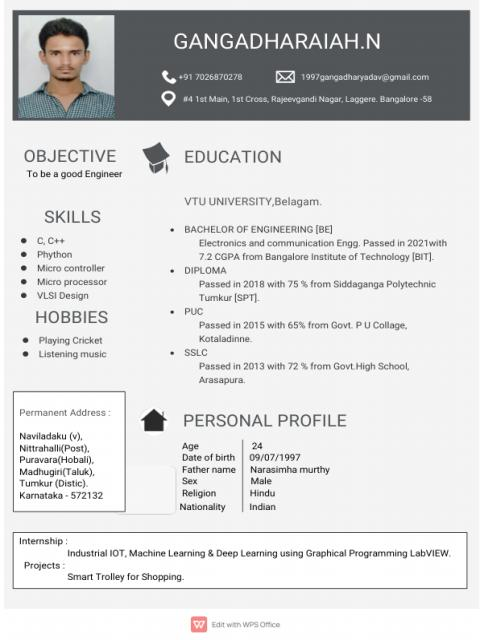

In [ ]:
img = cv2.imread('/content/PdfLayoutDetection/valid/images/230308083417-0_png.rf.2b4daae7ccd1ea69191c5d51eba2e208.jpg')

cv2_imshow(img)

In [ ]:
results = model.predict(source=img)
results


0: 640x480 17 blocks, 105.4ms
Speed: 2.7ms preprocess, 105.4ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)


[ultralytics.yolo.engine.results.Results object with attributes:
 
 boxes: ultralytics.yolo.engine.results.Boxes object
 keypoints: None
 keys: ['boxes']
 masks: None
 names: {0: 'block'}
 orig_img: array([[[254, 254, 254],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [243, 243, 243],
         [246, 246, 246],
         [251, 251, 251]],
 
        [[254, 254, 254],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [243, 243, 243],
         [246, 246, 246],
         [251, 251, 251]],
 
        [[254, 254, 254],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [243, 243, 243],
         [246, 246, 246],
         [251, 251, 251]],
 
        ...,
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
   


0: 640x480 17 blocks, 47.1ms
Speed: 4.3ms preprocess, 47.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


[   [   'PERSONAL PROFILE',
        'Datc of barth',
        '09/07/1997',
        'Father name',
        'Narjsimha Munhy',
        'Nele',
        'Religion',
        'Hhadd',
        'Natronallty',
        'Indien'],
    [   'GANGADHARAIAHN',
        '091 7026070278',
        'Tocroror nands',
        '@oidi ',
        'JMn',
        'Rijeeagand Nagar Laqjere_Earigblore-58',
        'Crorea'],
    ['OBJECTIVE', 'Jotbe', 'Engineei', 'good'],
    ['HOBBIES', 'Ploying Cricket', 'Listening musIc'],
    ['EDUCATION'],
    [   'Hemmanenl Addiess',
        'Naviladaku ()',
        'Mttrahall{Posik',
        'PuravarB{Hobalil',
        'Madhugir(Taluk}',
        'Tumkur (Distic)',
        'Karnataka - 572132'],
    [   'SKILLS',
        'Phython',
        'Micro contfoller',
        'HCIc',
        'plocess0',
        'VLSI Deaign'],
    [   'Inleonsmp',
        'IOT, Machne L earnina',
        'Deep Learning using Graphical Prograrnming LabView',
        'Projecls',
        'smart Trolley 

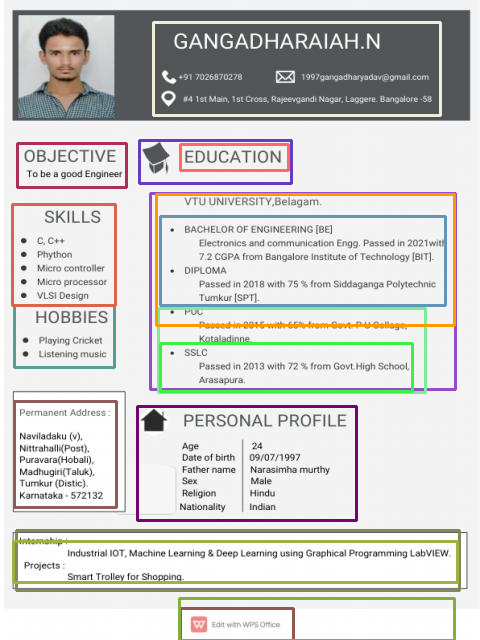

In [ ]:
annotImg, result = getAnnotatedImageAndResult(img)

pp.pprint(result)
cv2_imshow(annotImg)


0: 640x480 14 blocks, 48.6ms
Speed: 1.9ms preprocess, 48.6ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


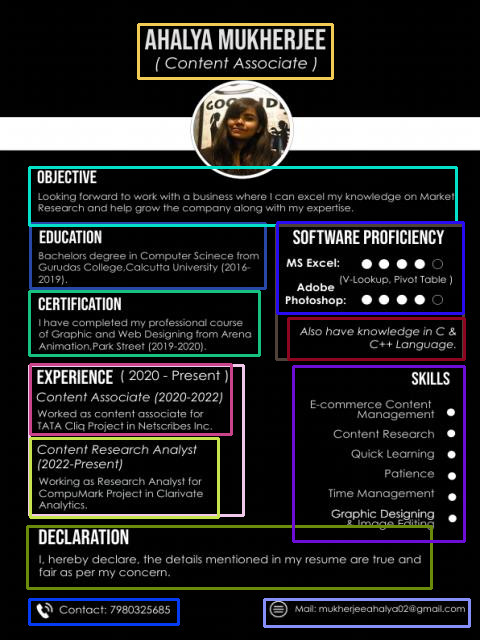

[['EDUCATION',
  'Bochelors degree in Computer Scinece trom',
  'Gurudas Collcge Cakutta Unlversity (2016',
  '20191.'],
 ['CERTIFICATION',
  'hove compleledmy professonaicourse',
  '0l Grophic und',
  'Designingtrom Arena',
  'Anlmatlon Par Sirce',
  '[2019-Z0201',
  'Ncb'],
 ['OBJECTIVE',
  'locking lcrwardi0 wOrtwuh',
  'Duine:s K here Ican excel my knowiedge onvakel',
  'Reseach andhelo Growthe compony Jongwhmye pertise,'],
 ['AHALYA MUKHERJEE', 'Content Associate )'],
 ['DECLARATION',
  'hereby declare',
  'the delails mentionedin my resume are True ana',
  'faras per my concern:'],
 ['SOFTWARE PROFICIENCY',
  'MS Excel:',
  'Lookup Pivol Toble',
  'Adobe',
  'Photoshop:',
  'AJso have knowledge In € &',
  'C+ Lanquage:'],
 ['SKILLS',
  'Ecommerce Content',
  'Management',
  'Content Research',
  'Quick Leaming',
  'Palience',
  'Time Management',
  'Graphic ge',
  ' Designing'],
 ['EXPERIENCE',
  '2020',
  'Present |',
  'Content Associate (2020-20221',
  'Wored',
  'content asso

In [ ]:
img = cv2.imread('/content/PdfLayoutDetection/valid/images/230308083522-0_png.rf.a4530741289ba6ff73d074782b0d4629.jpg')

# cv2_imshow(img)
annotImg, result = getAnnotatedImageAndResult(img)

cv2_imshow(annotImg)
result

As we can see, the regions and text are well separated from the resume.

In [ ]:
%%shell
pip install pdf2image
apt-get install poppler-utils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 24 not upgraded.
Need to get 174 kB of archives.
After this operation, 754 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 poppler-utils amd64 0.86.1-0ubuntu1.1 [174 kB]
Fetched 174 kB in 1s (160 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 122519 files and directories currently installed.)
Preparing to unpack .../poppler-utils_0.86.1-0ubuntu1.1_amd64.deb ...
Unpacking poppler-utils (0.86.1-0ubuntu1.1) ...
Setting up poppler-utils (0.86.1-0ubuntu1.1) ...
Processing triggers for man-db (2.9.1-1) ...


Now let us check the model in a completely new data for validation 

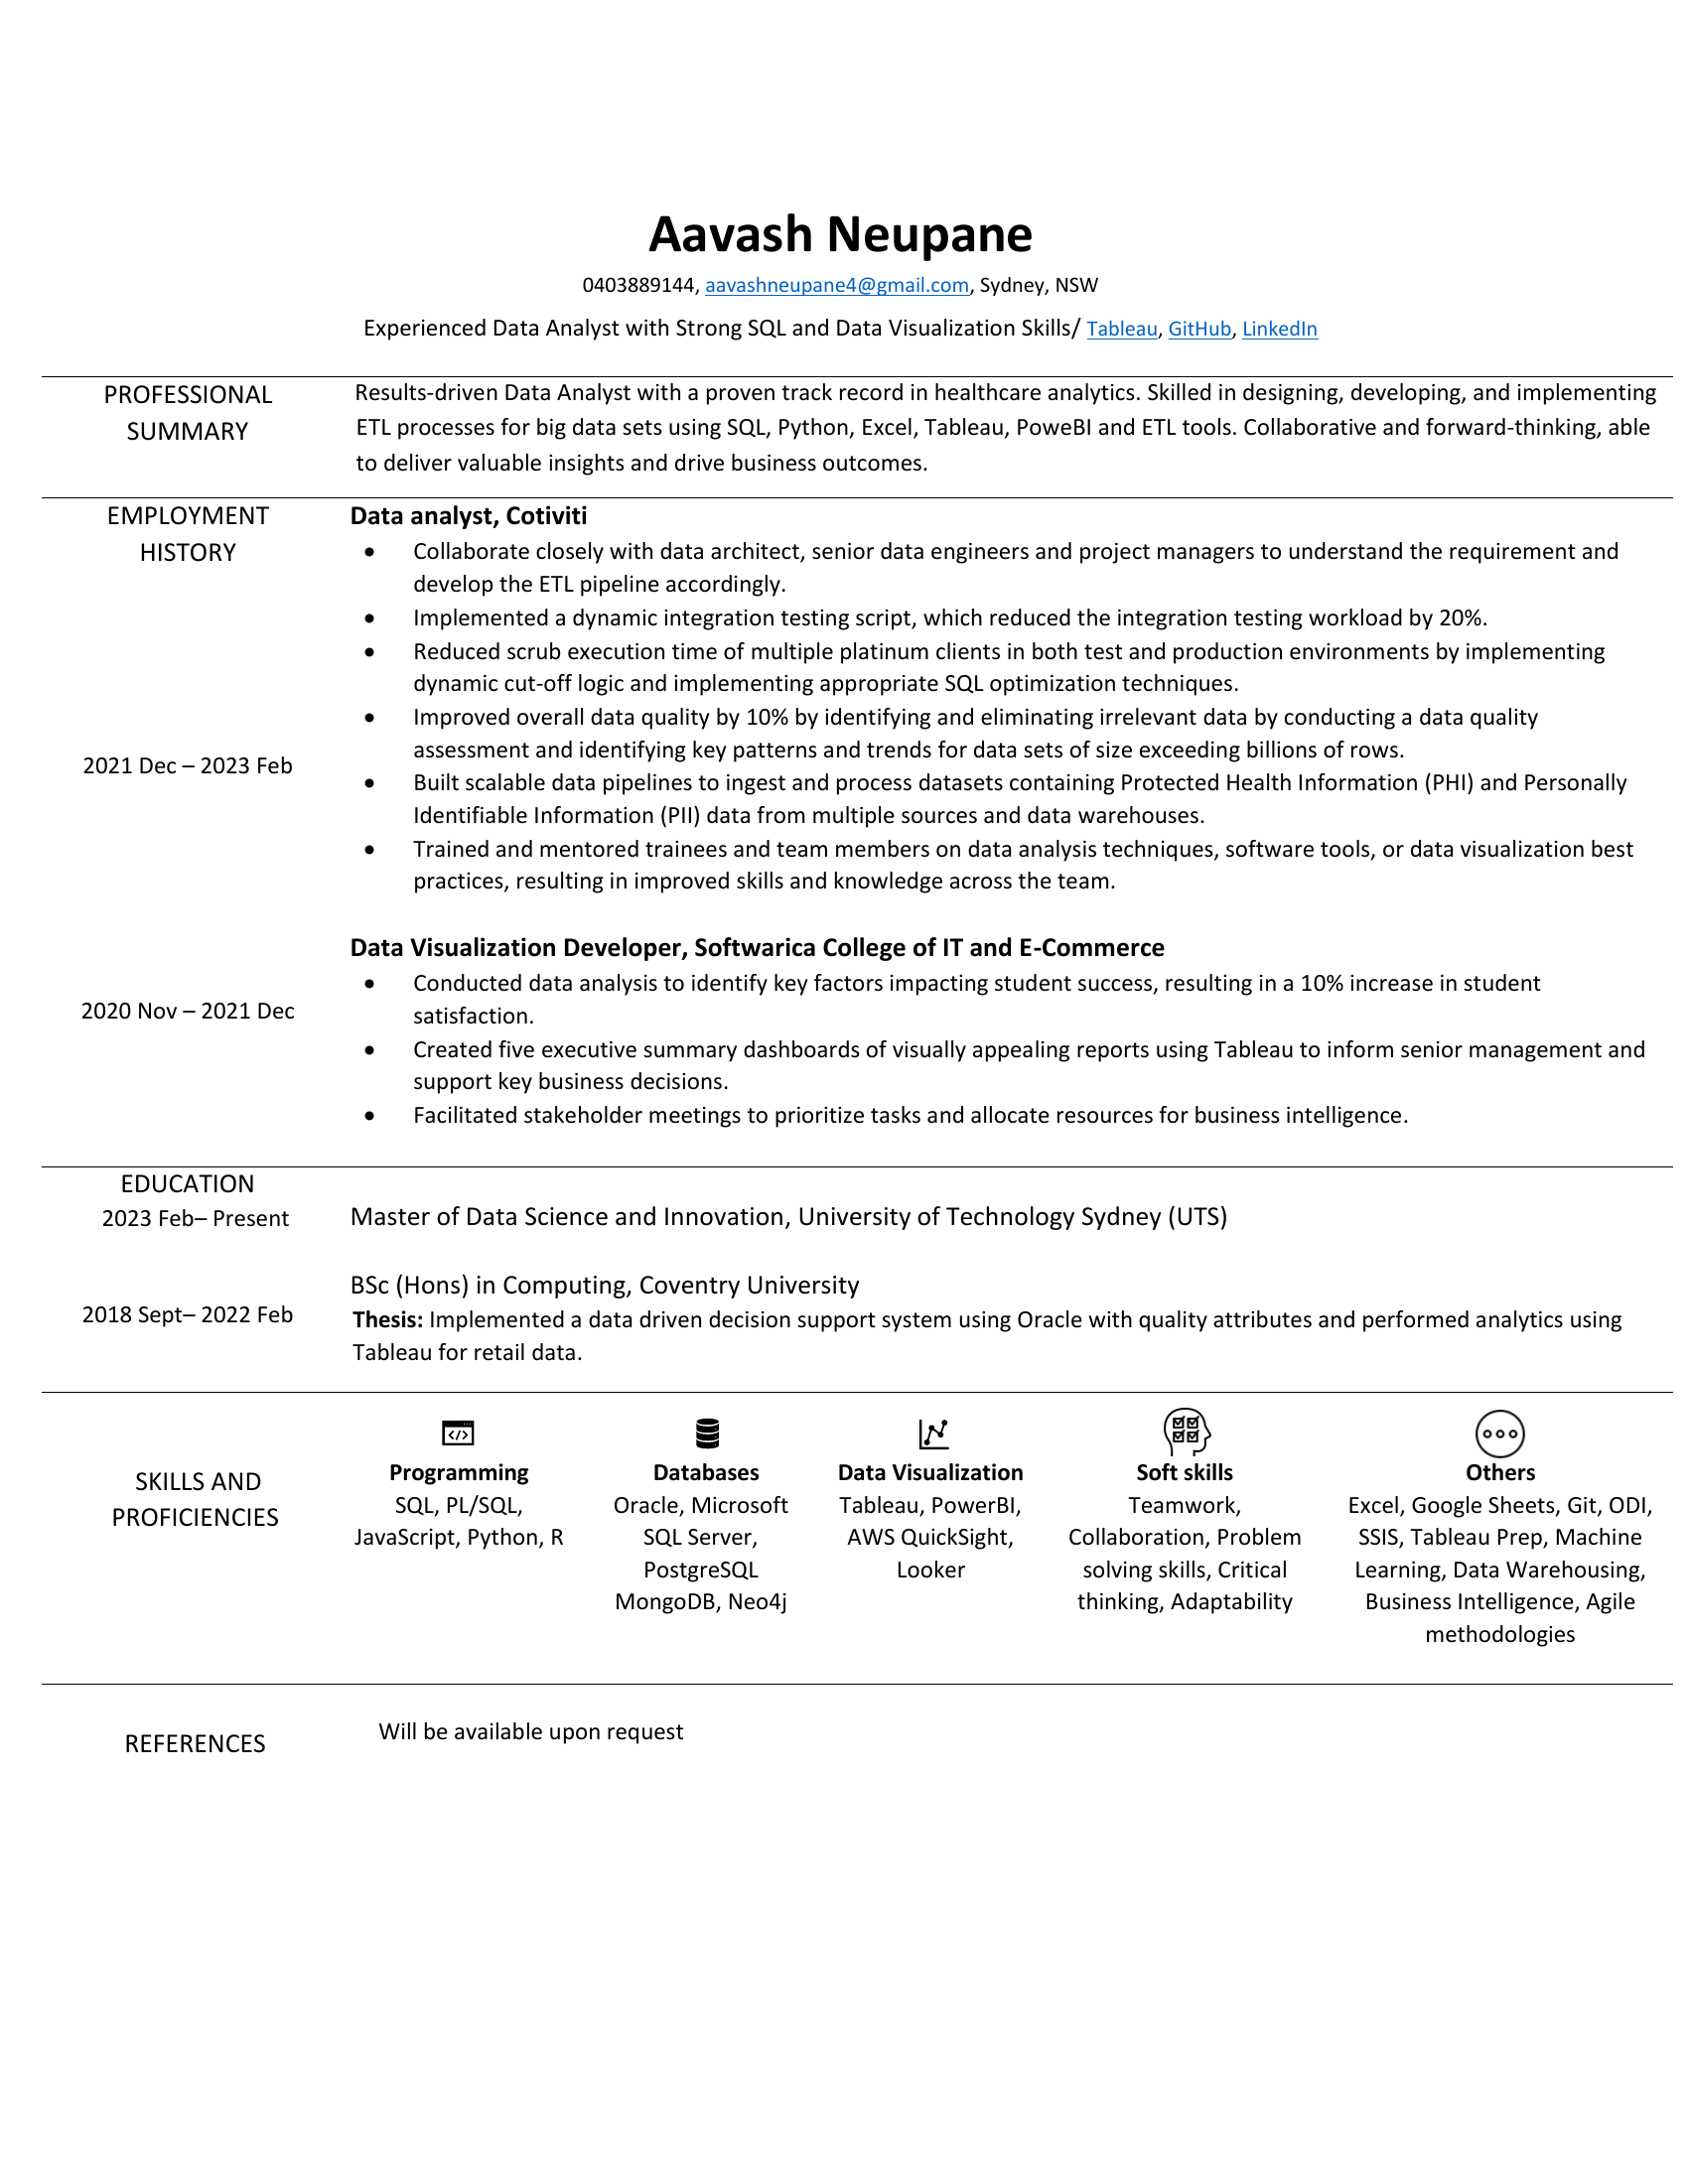

In [ ]:
from pdf2image import convert_from_path
images = convert_from_path('/content/PdfLayoutDetection/Aavash_Neupane_Resume.pdf')

images[0]


0: 640x512 18 blocks, 49.4ms
Speed: 4.1ms preprocess, 49.4ms inference, 3.1ms postprocess per image at shape (1, 3, 640, 640)


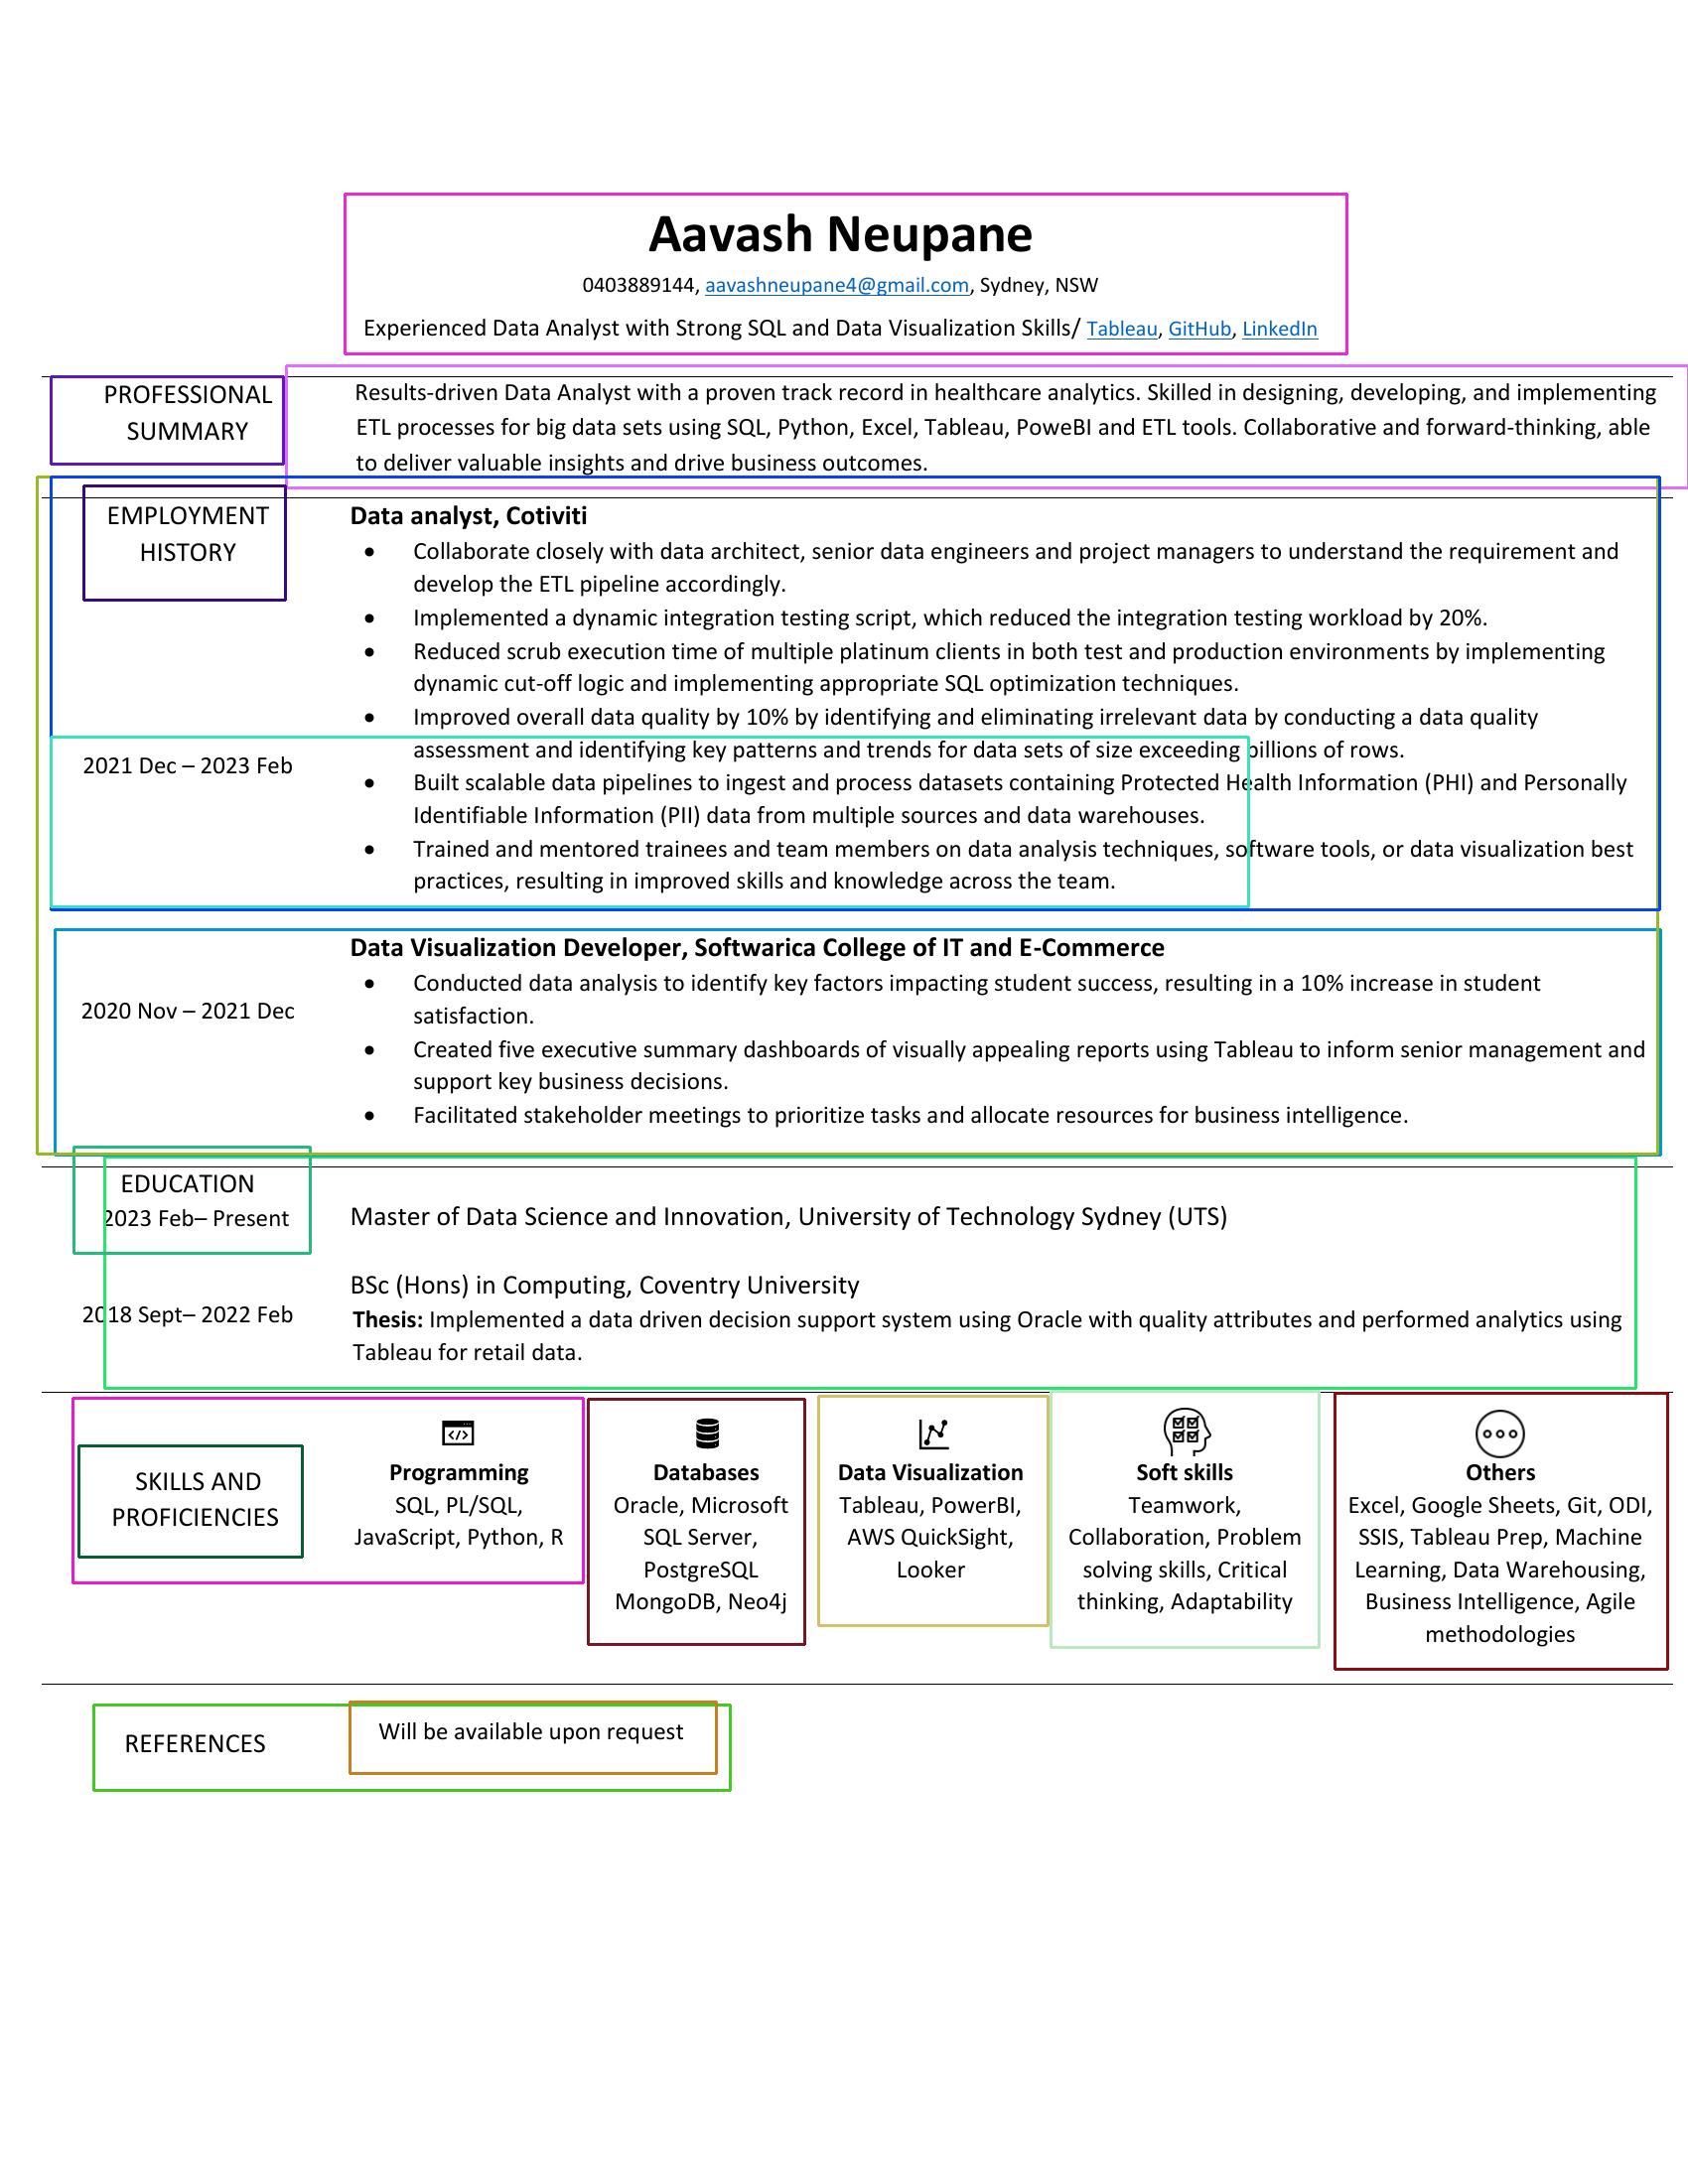

[['Aavash Neupane',
  '0403889144, aavashneupane4@gmailcom, Sydney, NSW',
  'Experienced Data Analyst with Strong SQL and Data Visualization Skills/ Tableau, GitHub, Linkedln'],
 ['Others',
  'Excel, Google Sheets, Git, ODI,',
  'SSIS, Tableau Prep, Machine',
  'Learning, Data Warehousing,',
  'Business Intelligence, Agile',
  'methodologies'],
 ['Soft skills',
  'Teamwork,',
  'Collaboration, Problem',
  'solving skills, Critical',
  'thinking, Adaptability'],
 ['N',
  'Data Visualization',
  'Tableau, PowerBI,',
  'AWS',
  'QuickSight,',
  'Looker'],
 ['EDUCATION',
  '2023 Feb- Present',
  'Master of Data Science and Innovation, University of Technology Sydney (UTS)',
  'BSc (Hons) in Computing, Coventry University',
  '18 Sept - 2022 Feb',
  'Thesis: Implemented a data driven decision support system using Oracle with quality attributes and performed analytics using',
  'Tableau for retail data.'],
 ['Data Visualization Developer, Softwarica College of IT and E-Commerce',
  'Conducte

In [ ]:
image_np = np.array(images[0])

img = cv2.cvtColor(image_np, cv2.COLOR_RGB2BGR)

# cv2_imshow(img)
annotImg, result = getAnnotatedImageAndResult(img)

cv2_imshow(annotImg)
result

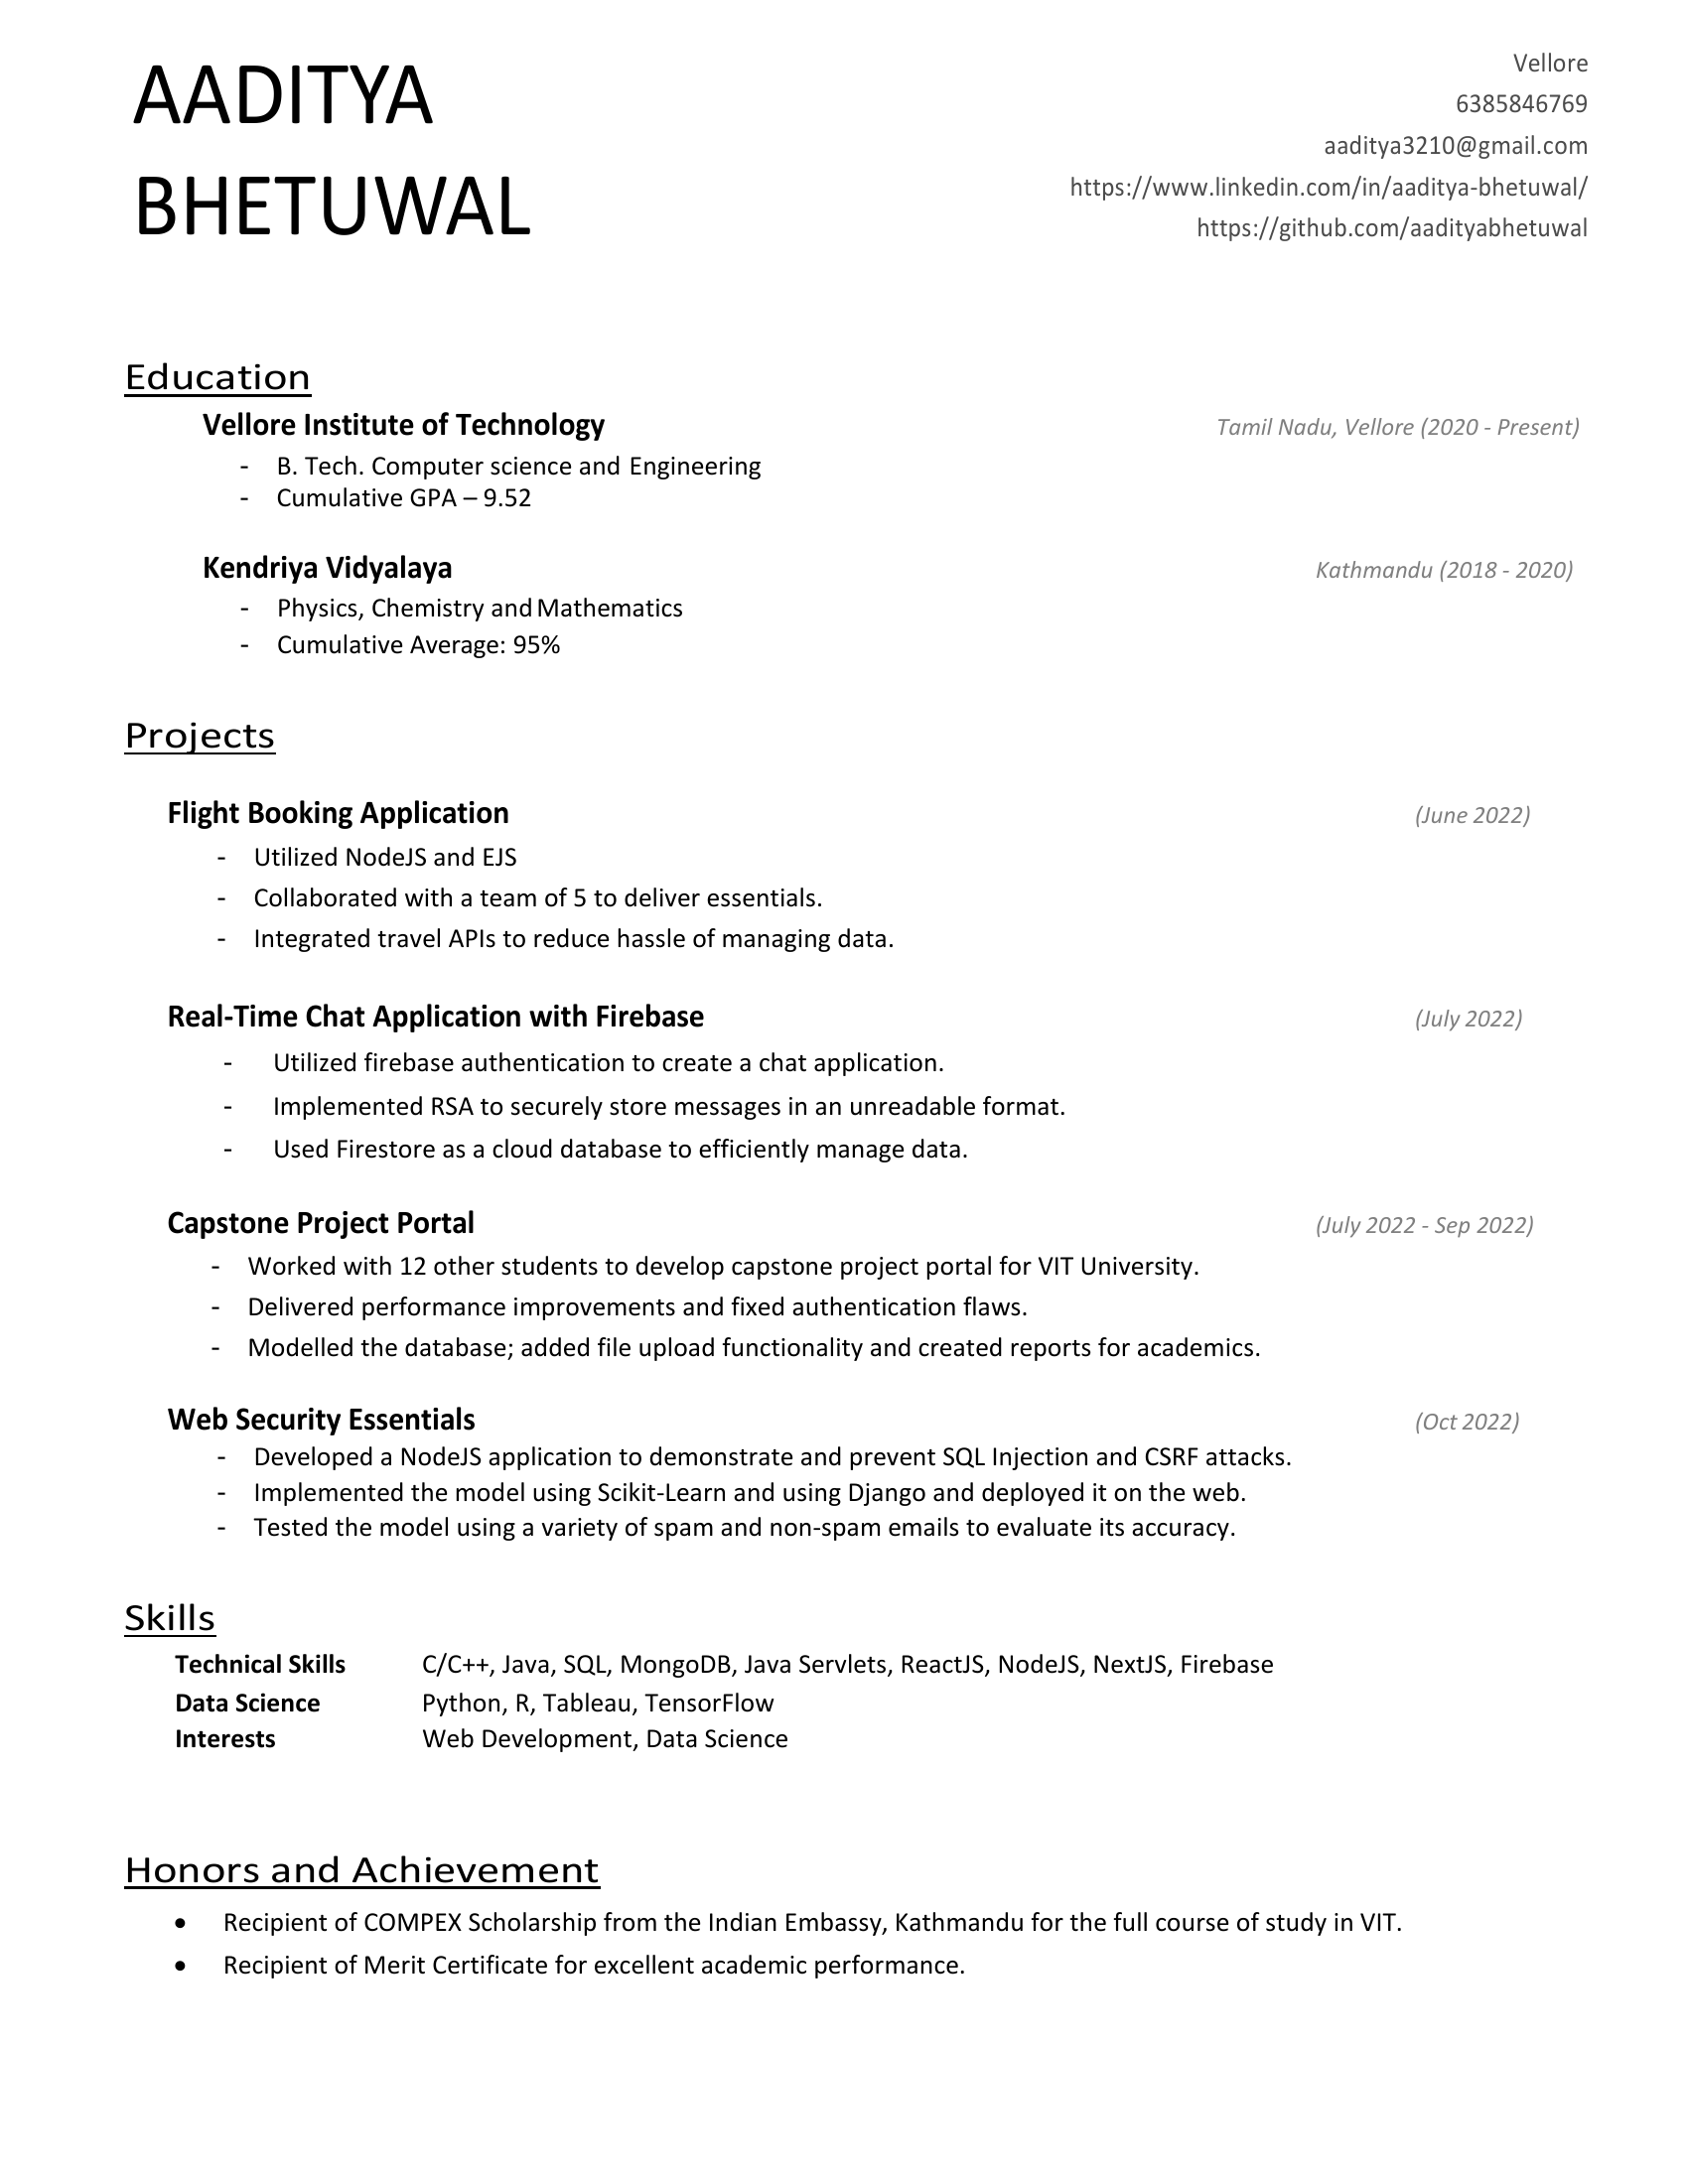

In [ ]:
image2 = convert_from_path('/content/Aaditya\'s Resume.pdf')

image2[0]


0: 640x512 16 blocks, 47.7ms
Speed: 5.9ms preprocess, 47.7ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)


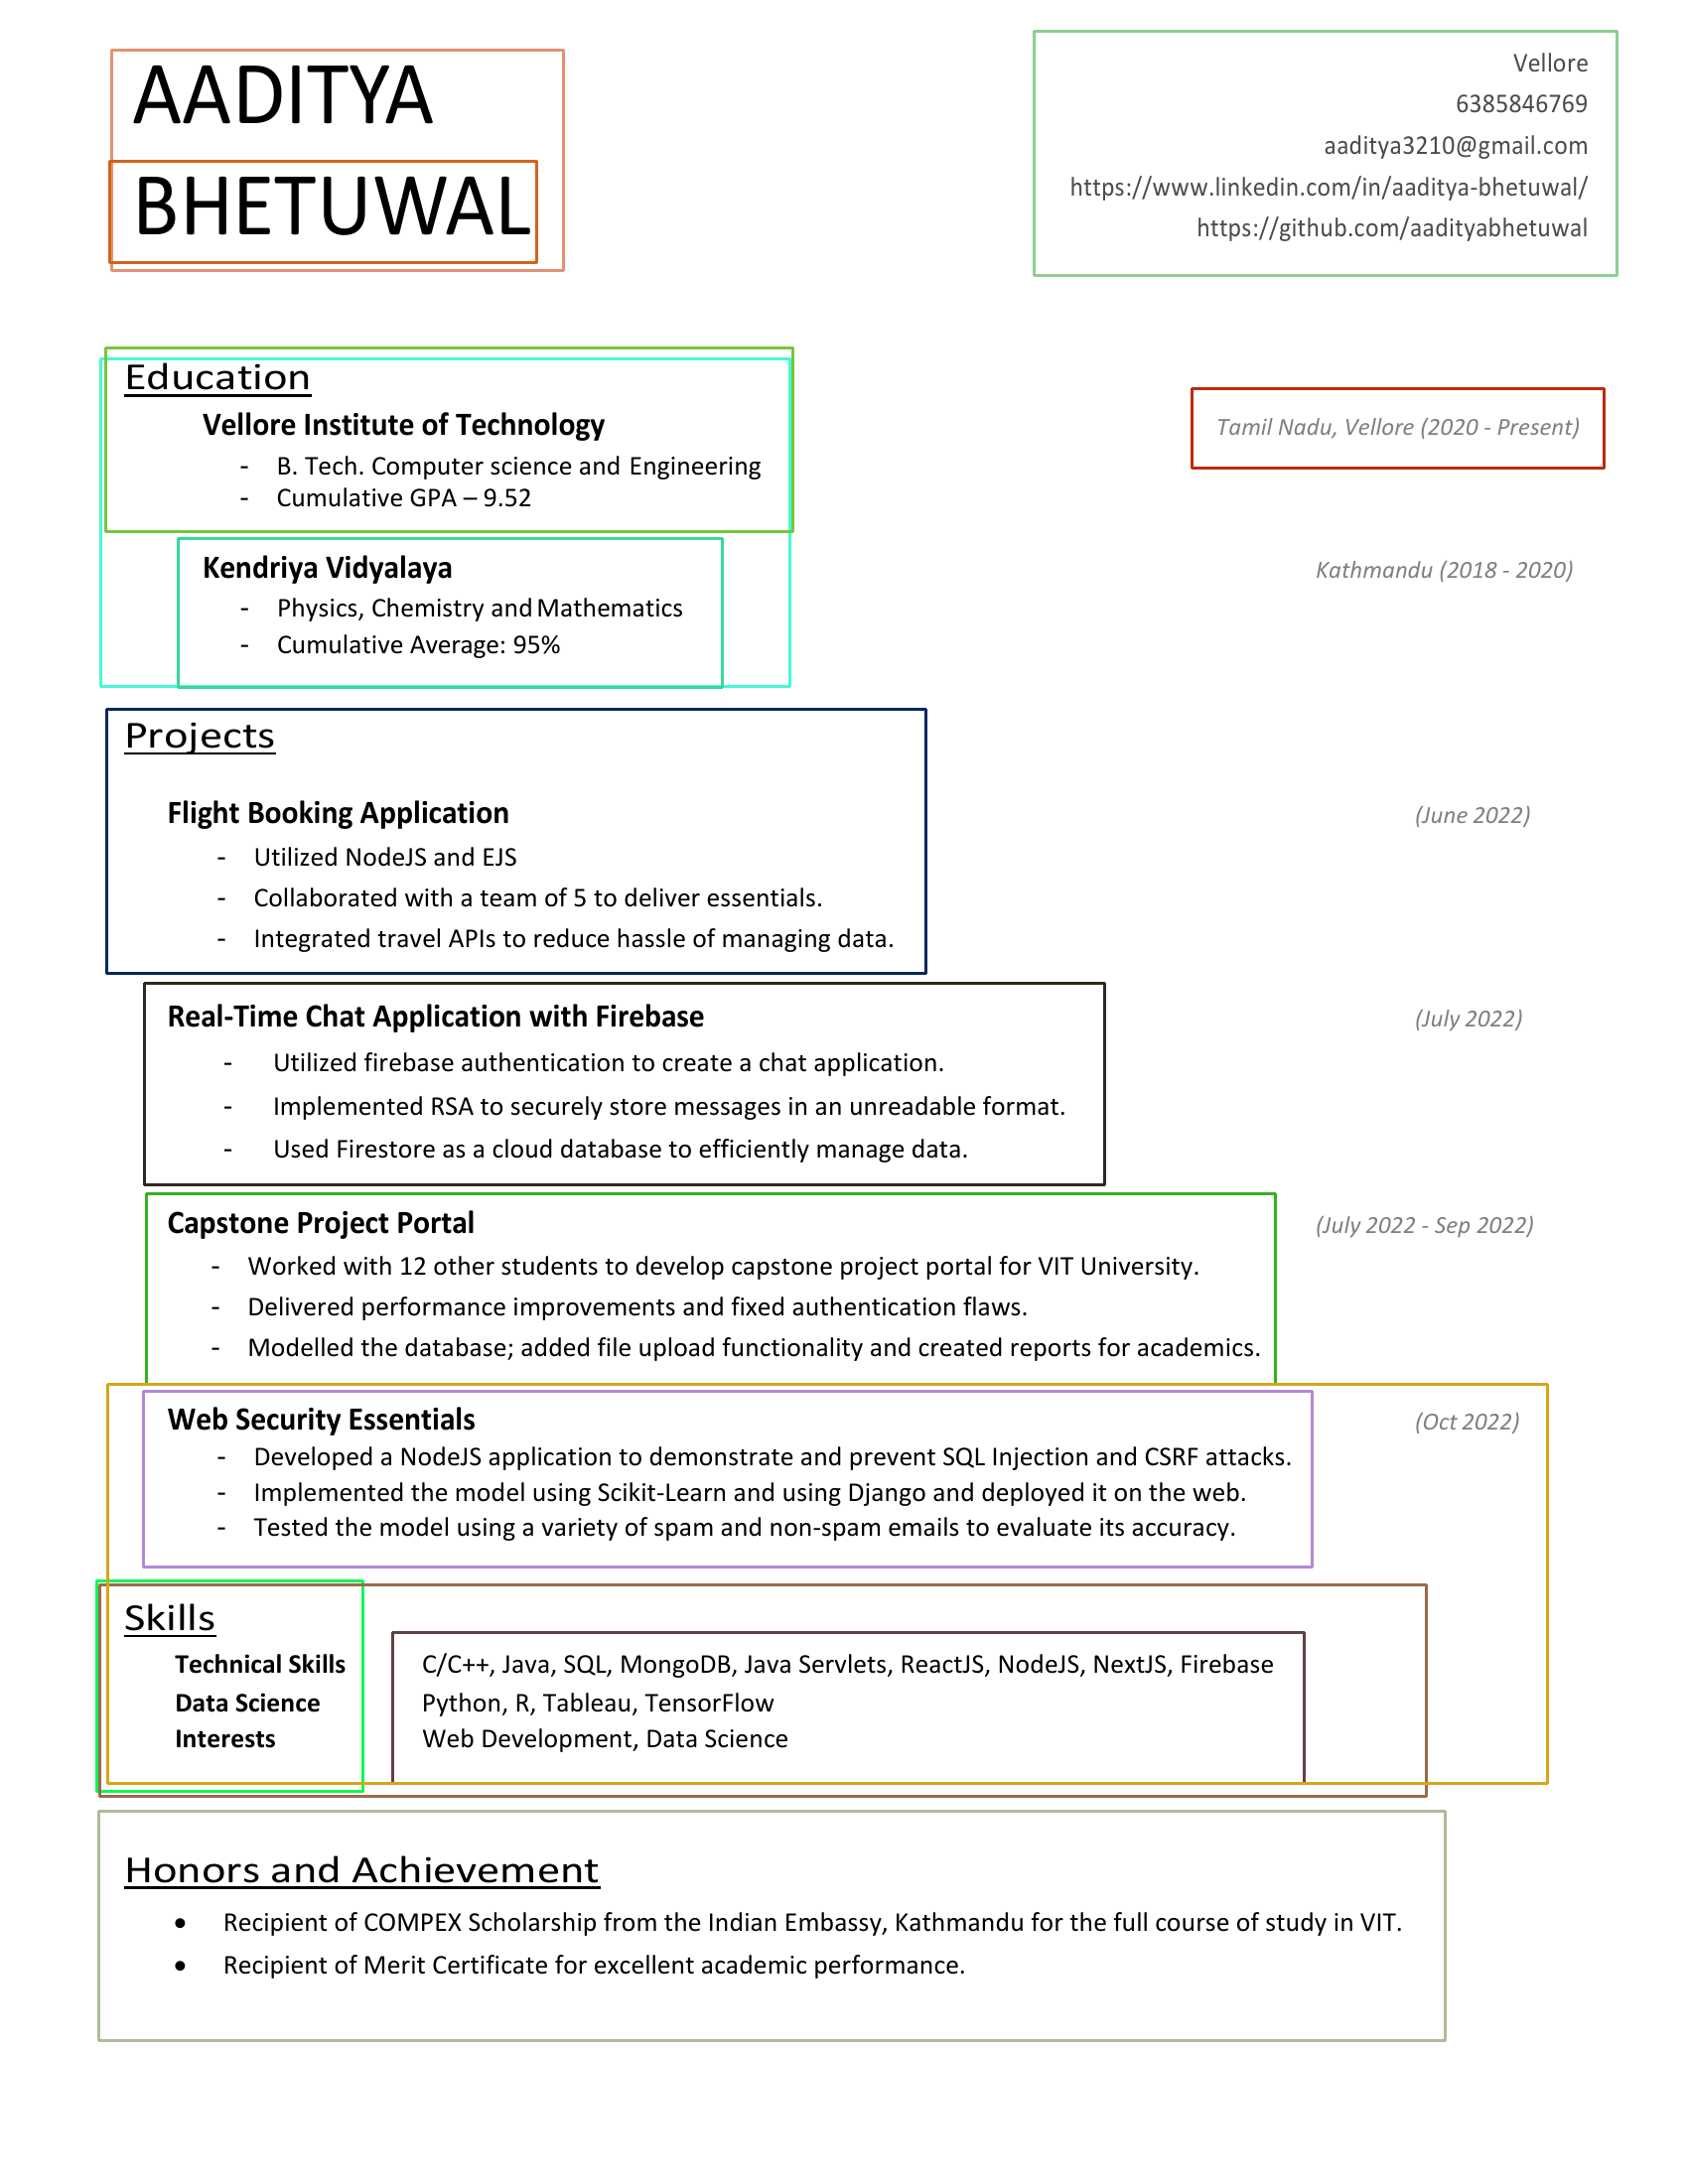

[['Real-Time Chat Application with Firebase',
  'Utilized firebase authentication to create a chat application.',
  'Implemented RSA to securely store messages in an unreadable format',
  'Used Firestore as a cloud database to efficiently manage data.'],
 ['Capstone Project Portal',
  'Worked with 12 other students to develop capstone project portal for VIT University:',
  'Delivered performance improvements and fixed authentication flaws.',
  'Modelled the database; added file upload functionality and created reports for academics_'],
 ['Honors and Achievement',
  'Recipient of COMPEX Scholarship from the Indian Embassy, Kathmandu for the full course of study in VIT:',
  'Recipient of Merit Certificate for excellent academic performance'],
 ['Web Security Essentials',
  'Developed a NodeJs application to demonstrate and prevent SQL Injection and CSRF attacks',
  'Implemented the model using Scikit-Learn and using Django and deployed it on the web.',
  'Tested the model using a variety

In [ ]:
image_np2 = np.array(image2[0])

img = cv2.cvtColor(image_np2, cv2.COLOR_RGB2BGR)

# cv2_imshow(img)
annotImg, result = getAnnotatedImageAndResult(img)

cv2_imshow(annotImg)
result

As we can see in the both two completely fresh resume, our model can successfully identify the regions of the dataset. This data can be further used for various types of screening and analytics.  